In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.morphology import erosion
import skimage.segmentation as sksegmentation
from tqdm import tqdm

from tensorflow_addons.losses import sigmoid_focal_crossentropy

In [2]:
seg = np.array(Image.open("/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/MoNuSeg2018Training/Masks/color/TCGA-21-5786-01Z-00-DX1.tiff"))

In [3]:
seg.dtype

dtype('uint8')

In [4]:
seg_eroded = erosion(seg)

In [5]:

colors = np.unique(seg.reshape(-1, seg.shape[2]), axis=0)


In [6]:
colors.shape

(558, 3)

In [7]:
colors[1]

array([ 0, 26, 94], dtype=uint8)

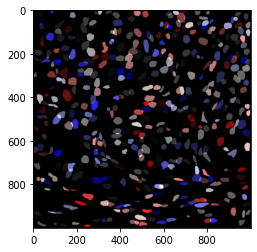

In [9]:
plt.imshow(seg_eroded)

In [ ]:
def get_border(segmentation):
    seg_border = np.zeros_like(segmentation)
    for c_index in tqdm(range(colors.shape[0])):
        color = colors[c_index, :]
        mask = np.all(segmentation == color, axis=-1)
        seg_border = sksegmentation.mark_boundaries(
            seg_border,
            mask,
            color=color / 255.0,
            mode="thick",
        )
    return seg_border



In [ ]:
seg_border = get_border(seg[:256,:256,:])

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(seg_border)

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(seg_border)